# Konten
* [Tahap 1 Deskripsi Proyek]
* [Tahap 2 Import Module]
* [Tahap 3 Import Datasets]
* [Tahap 4 Memperbaiki Datasets]
    * [4.1 Merubah Tipe Data]
    * [4.2 Mengatasi Nilai yang Hilang]
    * [4.3 Menghitung perolehan emas]
    * [4.4 Fitur yang hilang dari test set]
* [Tahap 5 Analisis Data]
    * [Tahap 5.1 Konsentrasi Au, Ag, Pb]
    * [Tahap 5.2 Membandingkan Distribusi Umpan training dan test]
    * [Tahap 5.3 Total Konsentrasi di Tahapan Berbeda]
    * [Tahap 5.4 Menghilangkan Outlier]
    * [Tahap 5.4 Menggabungkan Data]
* [Tahap 6 Membuat Model]
    * [Tahap 6.1 Membuat Fungsi sMAPE]
    * [Tahap 6.2 Melatih Model Linear Regression]
    * [Tahap 6.3 Melatih Model Decision Tree Regressor]
    * [Tahap 6.4 Melatih Model Random Forest]
    * [Tahap 6.5 Menerapkan Model pada Test Set]
* [Tahap 7 Kesimpulan]

# Deskripsi Proyek


Data ini diindeks sesuai dengan tanggal dan waktu perolehannya (fitur date). Terkait waktu, parameter yang letaknya bersebelahan umumnya bersifat mirip.
Sebagian parameter tidak tersedia karena pengukuran dan/atau penghitungannya dilakukan jauh setelahnya. Itulah sebabnya, beberapa fitur yang ada di training set mungkin tidak ada di test set. Test set-nya pun juga tidak memuat target.
Dataset sumber memuat training dan test set dengan semua fitur-fiturnya.

# Import  Module

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import Datasets

In [398]:
try:
    train = pd.read_csv('D:\datasets\projek_10\gold_recovery_train.csv')
    test = pd.read_csv('D:\datasets\projek_10\gold_recovery_test.csv')
    full = pd.read_csv('D:\datasets\projek_10\gold_recovery_full.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
    full = pd.read_csv('/datasets/gold_recovery_full.csv')

# Memeriksa Datasets

In [399]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [400]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [401]:
full.info()
full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Informasi yang didapatkan:** 
- Pada data train, terdapat 87 kolom dan 16860 baris. Akan tetapi terdapat beberapa kolom yang memiliki nilai yang hilang.
- Pada data test, terdapat 53 kolom dan 5856 baris. Akan tetapi terdapat beberapa kolom yang memiliki nilai yang hilang.
- Pada data full, terdapat 87 kolom dan 22716 baris. Akan tetapi terdapat beberapa kolom yang memiliki nilai yang hilang.
- Semua data memiliki satu tipe data yang salah yaitu pada komo `date`.
- Beberapa fitur yang tidak diperlukan akan dihapus.
- Target kita adalah `rougher.output.recovery` dan `final.output.recovery`.

# Memperbaiki Datasets

## Merubah Tipe Data

In [402]:
# Merubah tipe data object menjadi datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

In [403]:
# Memeriksa datatypes
train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [404]:
# Memeriksa datatypes
test.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [405]:
# Memeriksa datattypes
full.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

## Mengatasi Nilai yang Hilang

In [406]:
# Memeriksa berapa persen data yang hilang
train.isna().sum()/len(train)*100

date                                          0.000000
final.output.concentrate_ag                   0.427046
final.output.concentrate_pb                   0.427046
final.output.concentrate_sol                  2.194543
final.output.concentrate_au                   0.421115
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.504152
secondary_cleaner.state.floatbank5_b_air      0.504152
secondary_cleaner.state.floatbank5_b_level    0.498221
secondary_cleaner.state.floatbank6_a_air      0.610913
secondary_cleaner.state.floatbank6_a_level    0.504152
Length: 87, dtype: float64

In [407]:
# Memeriksa berapa persen data yang hilang
test.isna().sum()/len(test)*100

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [408]:
# Memeriksa berapa persen data yang hilang
full.isna().sum()/len(full) * 100

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

Kebanyakan data yang hilang adalah di bawah **5%**. Jadi, tidak masalah untuk data yang hilang dilakukan drop.

In [409]:
# Menghapus data yang hilang
train = train.dropna()
test = test.dropna()
full = full.dropna()

In [410]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                11017 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         11017 non-null  float64       
 2   final.output.concentrate_pb                         11017 non-null  float64       
 3   final.output.concentrate_sol                        11017 non-null  float64       
 4   final.output.concentrate_au                         11017 non-null  float64       
 5   final.output.recovery                               11017 non-null  float64       
 6   final.output.tail_ag                                11017 non-null  float64       
 7   final.output.tail_pb                                11017 non-null  float64       
 8   final.

In [411]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5383 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5383 non-null   float64       
 2   primary_cleaner.input.depressant            5383 non-null   float64       
 3   primary_cleaner.input.feed_size             5383 non-null   float64       
 4   primary_cleaner.input.xanthate              5383 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64       
 9   primary_

In [412]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16094 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16094 non-null  float64       
 2   final.output.concentrate_pb                         16094 non-null  float64       
 3   final.output.concentrate_sol                        16094 non-null  float64       
 4   final.output.concentrate_au                         16094 non-null  float64       
 5   final.output.recovery                               16094 non-null  float64       
 6   final.output.tail_ag                                16094 non-null  float64       
 7   final.output.tail_pb                                16094 non-null  float64       
 8   final.

## Menghitung Perolehan Emas

In [413]:
'''Untuk menghitung perolehan emas kita memerlukan 3 variabel:
- C: Merupakan konsentrat tepat setelah proses flotasi. Yang mana hal ini merupakan concentrate_au.
- F: Merupakan presentase emas dalam umpan sebelum proses flotasi. Yang mana hal ini merupakan feed_au.
- T: Merupakan presentase emas dalam ekor yang lebih kasar. Yang mana hal ini merupakan tail_au.
'''

# Fungsi untuk menghitung perolehan emas
def calculate_recovery(c, f, t):
    formula = ((c*(f-t))/(f*(c-t))) * 100
    return formula

recovery = train['rougher.output.recovery']
concentrate = train['rougher.output.concentrate_au']
feed = train['rougher.input.feed_au']
tail = train['rougher.output.tail_au']

# Penerapan fungi untuk menghitung perolehan emas
calculated = calculate_recovery(concentrate, feed, tail)
print(calculated.head())

# Menghitung nilai
mae = mean_absolute_error(recovery, calculated)
print('Perolehan skor MAE:', mae)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64
Perolehan skor MAE: 9.460144184559453e-15


**Dari Informasi di Atas:** Nilai perhitungan perolehan emas dan perhitungan asli sudah benar. Dilihat dari metriks MAE yang mendekati angka 0.

## Fitur yang kurang dari test set

In [414]:
# Mencari fitur yang tidak ada di test set
df = pd.DataFrame()
list_columns = list(test.columns)
for col in list(train.columns):
    if col not in list_columns: # Jika fitur di train set tidak ada di test set
        df[col] = train[col] # Memunculkan fitur yang sama dengan train set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                                11017 non-null  float64


**Fitur-fitur yang tidak ada di test set:**
- Ada 9 paramater di stage `final`.
- Ada 8 parameter di stage `primary_cleaner`.
- Ada 13 parameter di stage `rougher`.
- Ada 4 parameter di stage `secondary_cleaner`.
- Total ada 34 fitur yang tidak tersedia di test set.

Dengan kata lain, kita tidak menggunakan data ini untuk tahap selanjutnya yaitu analisis data.

# Analisis Data

## Konsentrasi Au, Ag, Pb

In [415]:
'''Untuk mengetahui bagiaman perubahan konsentrasi dari setiap logam, maka dibuat tabel histogram untuk mengamati perubahannya.
Data yang digunakan adalah data training dan kolom yang digunakan adalah kolom dari setiap proses floatasi
'''

# list untuk membuat plot konsentrasi
concentrate_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au','final.output.concentrate_au']
concentrate_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag','final.output.concentrate_ag']
concentrate_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb','final.output.concentrate_pb']

# Membuat fungsi untuk plot setiap perubahan konsentrasi yang terjadi
def plot_concentrate(data, list_stage):
    for stage in list_stage:
        data[stage].plot(kind='hist', legend=True, alpha=0.4)
        plt.xlabel('concentration')

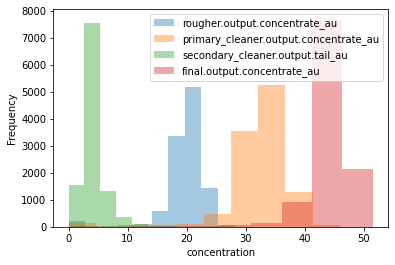

In [416]:
plot_concentrate(train, concentrate_au)

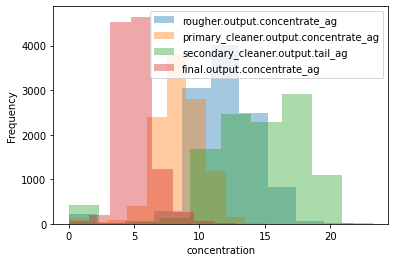

In [417]:
plot_concentrate(train, concentrate_ag)

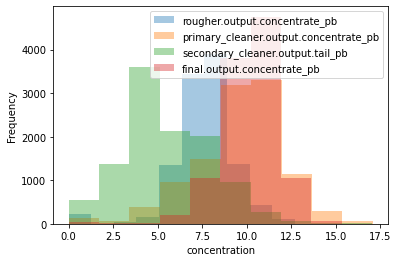

In [418]:
plot_concentrate(train, concentrate_pb)

**Dari informasi di atas:**
- Untuk konsentrasi yang terjadi pada logam Au, terdapat peningkatan mulai dari tahap awal pemurnian sampai pada hasil akhir mempunyai tingkat konsentrasi yang tinggi.
- Untuk konsentrasi yang terjadi pada logam Ag, tidak terjadi peningkatan melainkan untuk final konsentratnya itu banyak yang rendah. Tidak terjadi begitu banyak perubahan jumlah konsentrat pada logam ini.
- Untuk konsentrasi yang terjadi pada logam Pb, tidak terjadi peningkatan. Bahkan tingkat konsentrasinya sangat rendah. Tapi masih ada peningkatan dalam tahap flotasi, jika dibandingkan dengan logam Ag.

Bisa kita simpulkan sementara, Au memiliki tingkat konsentrat tertinggi dibandingkan dengan Pb dan Ag.

## Membandingkan Distribusi Umpan _training_ dan _test_

Text(0.5, 0, 'Feed Size')

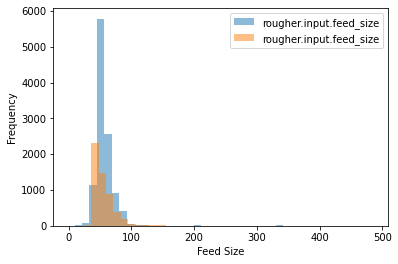

In [419]:
# Membuat plot histogram
train['rougher.input.feed_size'].plot(kind='hist', legend=True, alpha=0.5, bins=40)
test['rougher.input.feed_size'].plot(kind='hist', legend=True, alpha=0.5, bins=40)
plt.xlabel('Feed Size')

In [420]:
train['rougher.input.feed_size'].describe()

count    11017.000000
mean        57.215128
std         18.913146
min          9.659576
25%         48.397242
50%         53.843359
75%         61.461770
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [421]:
test['rougher.input.feed_size'].describe()

count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64

**Berdasarkan Informasi Di Atas:** Distribusi ukuran partikel umpan dalam training set dan test set terlihat tidak jauh berbeda. Meskipun frekuensinya jauh karena jumlah data dari kedua data set.

## Total Konsentrasi Di Tahapan Berbeda

In [422]:
# Tahapan feed
input_feed = ['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag', 'rougher.input.feed_sol']

# Tahapan yang lebih kasar
output_rougher = ['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol']

# Tahapan final
final_output = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']

In [423]:
# Menjumlahkan semua nilai konsentrasi pada subtansi dan tahap yang berbeda
full['total_input_feed'] = full[input_feed].sum(axis=1).reset_index(drop=True)
full['total_output_rougher'] = full[output_rougher].sum(axis=1).reset_index(drop=True)
full['total_final_output'] = full[final_output].sum(axis=1).reset_index(drop=True)

<AxesSubplot:>

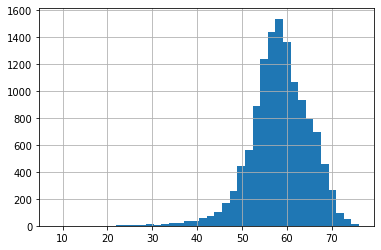

In [424]:
full['total_input_feed'].hist(bins=40, label='Input Concentrate')

<AxesSubplot:>

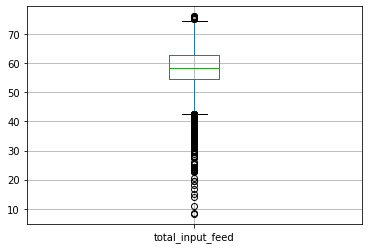

In [425]:
full.boxplot(column='total_input_feed')

<AxesSubplot:>

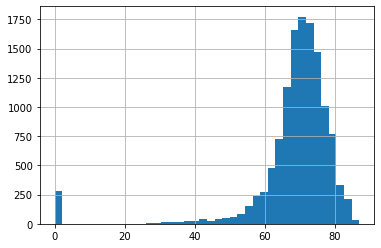

In [426]:
full['total_output_rougher'].hist(bins=40, label='Output Concentrate')

<AxesSubplot:>

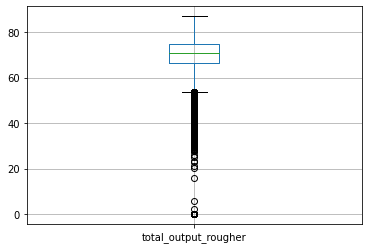

In [427]:
full.boxplot(column='total_output_rougher')

<AxesSubplot:>

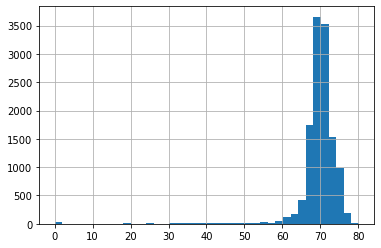

In [428]:
full['total_final_output'].hist(bins=40, label='Final Concentrate')

<AxesSubplot:>

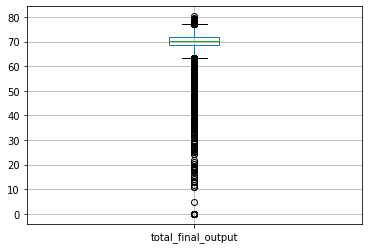

In [429]:
full.boxplot(column='total_final_output')

Jika dilihat berdasarkan histogram yang dibuat, nilai yang dijumlahkan memiliki begitu banyak outlier. Data pada histogram juga menunjukkan bahwa data lebih condong ke kanan. Hal ini akan mempengaruhi analisis dan pembuatan model. Maka dari itu, kita akan menghapus outlier yang ada di data train.

## Menghilangkan Outlier

In [430]:
# def find_outlier(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3-Q1
#     upper_limit = Q3+(1.5*IQR)
#     lower_limit = Q1-(1.5*IQR)
    
#     # plot batas atas
#     data.to_frame().boxplot(column=[0])
#     plt.hlines(y=upper_limit, xmin=0.9, xmax=1.1, color='red')
    
#     #plot batas bawah
#     data.to_frame().boxplot(column=[0])
#     plt.hlines(y=lower_limit, xmin=0.9, xmax=1.1, color='red')
#     return lower_limit, upper_limit

### Data Feed

In [431]:
# Menentukan Q1, Q2, dan IQR
Q1_feed = full['total_input_feed'].quantile(0.25)
Q3_feed = full['total_input_feed'].quantile(0.75)
IQR_feed = Q3_feed-Q1_feed

In [432]:
# Menentukan batas atas dan batas bawah
batas_atas_feed = Q3_feed+(1.5*IQR_feed)
batas_bawah_feed = Q1_feed-(1.5*IQR_feed)

74.88299766799092

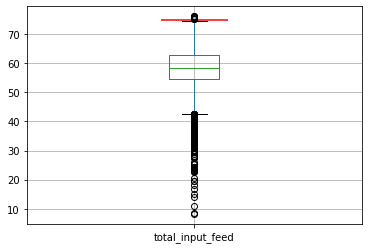

In [433]:
# boxplot dengan memunculkan batas atas dan batas bawah
full.boxplot(column='total_input_feed')
plt.hlines(y=batas_atas_feed, xmin=0.9, xmax=1.1, color='red')
batas_atas_feed

42.575928501312646

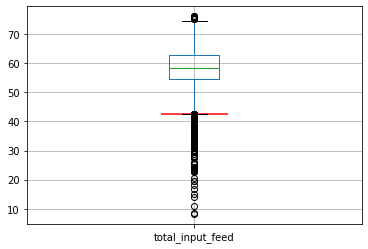

In [434]:
full.boxplot(column='total_input_feed')
plt.hlines(y=batas_bawah_feed, xmin=0.9, xmax=1.1, color='red')
batas_bawah_feed

### Data Output 

In [435]:
# Menentukan Q1, Q2, dan IQR
Q1_output = full['total_output_rougher'].quantile(0.25)
Q3_output = full['total_output_rougher'].quantile(0.75)
IQR_output = Q3_output-Q1_output

In [436]:
# Menentukan batas atas dan batas bawah
batas_atas_output = Q3_output+(1.5*IQR_output)
batas_bawah_output = Q1_output-(1.5*IQR_output)

87.51640117856937

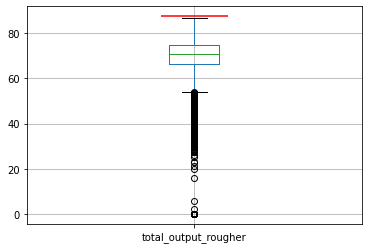

In [437]:
# boxplot dengan memunculkan batas atas dan batas bawah
full.boxplot(column='total_output_rougher')
plt.hlines(y=batas_atas_output, xmin=0.9, xmax=1.1, color='red')
batas_atas_output

53.81409291459028

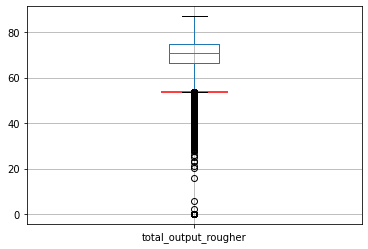

In [438]:
full.boxplot(column='total_output_rougher')
plt.hlines(y=batas_bawah_output, xmin=0.9, xmax=1.1, color='red')
batas_bawah_output

### Data Final

In [439]:
# Menentukan Q1, Q2, dan IQR
Q1_final = full['total_final_output'].quantile(0.25)
Q3_final = full['total_final_output'].quantile(0.75)
IQR_final = Q3_final-Q1_final

In [440]:
# Menentukan batas atas dan batas bawah
batas_atas_final = Q3_final+(1.5*IQR_final)
batas_bawah_final = Q1_final-(1.5*IQR_final)

77.0477645580381

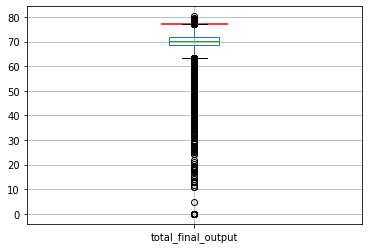

In [441]:
# boxplot dengan memunculkan batas atas dan batas bawah
full.boxplot(column='total_final_output')
plt.hlines(y=batas_atas_final, xmin=0.9, xmax=1.1, color='red')
batas_atas_final

63.275708947684315

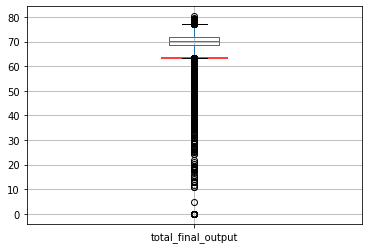

In [442]:
full.boxplot(column='total_final_output')
plt.hlines(y=batas_bawah_final, xmin=0.9, xmax=1.1, color='red')
batas_bawah_final

**Berdasarkan informasi di atas:** 
- Data feed memiliki batas atas **73.56** dan batas bawah sekitar **41.11**.
- Data output memiliki batas atas **86.59** dan batas bawah sekitar **52.79**.
- Data final memiliki batas atas **76.41** dan batas bawah sekitar **62.81**.

Data akan difilter dengan tidak mengambil nilai outliernya.

In [443]:
# Filter data berdasarkan nilai batas bawah dan batas atas
full_without_outlier = full.query('42.57< total_input_feed <74.88')
full_without_outlier = full_without_outlier.query('53.81< total_output_rougher <87.51')
full_without_outlier = full_without_outlier.query('63.27< total_final_output <77.04')
full_without_outlier.shape

(11409, 90)

<AxesSubplot:>

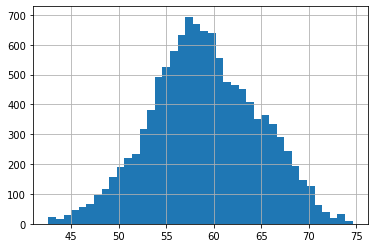

In [444]:
full_without_outlier['total_input_feed'].hist(bins=40)

<AxesSubplot:>

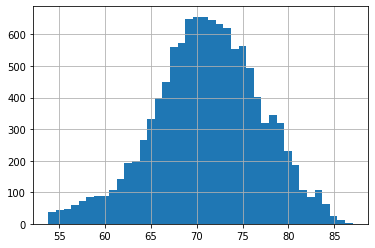

In [445]:
full_without_outlier['total_output_rougher'].hist(bins=40)

<AxesSubplot:>

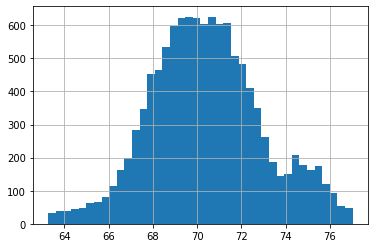

In [446]:
full_without_outlier['total_final_output'].hist(bins=40)

Data sudah terhindar dari outlier. Sekarang yang dilakukan adalah melengkapi data-data yang kurang pada `test set`.

## Menggabungkan Data

In [447]:
# Menghilangkan outlier di train set
total_data = full_without_outlier[['date', 'total_output_rougher']]
train_model = train.merge(total_data, how='left', on='date')

train_model = train_model[train_model['total_output_rougher'].notnull()]
train_model = train_model.drop(['total_output_rougher'], axis=1)
print("Ukuran data:", train_model.shape)

Ukuran data: (7595, 87)


In [448]:
# Menentukan target dan features pada train set
train_targets = train_model[['rougher.output.recovery', 'final.output.recovery']]
print("Ukuran target:", train_targets.shape)

'''Karena kolom di test set tidak sama dengan yang di train set, maka kolom pada train set
akan disamakan dengan test set.
'''
train_features = train_model.loc[:, list(test.columns)].drop(['date'], axis=1)
print("Ukuran features", train_features.shape)

Ukuran target: (7595, 2)
Ukuran features (7595, 52)


Karena pada test set tidak ada kolom target yaitu `rougher.output.recovery` dan `final.output.recovery`. Maka kita ambil nilai kolom itu di data full. Bukan hanyak itu, untuk menghilangkan outlier juga di test set, kita juga akan mengambil kolom `concentrate`. Jadi, total ada 10 kolom

In [449]:
# Menghilangkan outlier di test set
data_set = ['date', 'rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
          'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
          'rougher.output.concentrate_sol', 'final.output.concentrate_au', 
          'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']
data_sub_full = full.loc[:, list(data_set)]
data_sub_full.head()

,date,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_ag,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
0,2016-01-15 00:00:00,87.107763,70.541216,19.793808,7.101074,11.500771,28.029297,42.192020,6.055403,9.889648,5.507324
1,2016-01-15 01:00:00,86.843261,69.266198,20.050975,7.278807,11.615865,28.067063,42.701629,6.029369,9.968944,5.257781
2,2016-01-15 02:00:00,86.842308,68.116445,19.737170,7.216833,11.695753,27.454037,42.657501,6.055926,10.213995,5.383759
3,2016-01-15 03:00:00,87.226430,68.347543,19.320810,7.175616,11.915047,27.341277,42.689819,6.047977,9.977019,4.858634
4,2016-01-15 04:00:00,86.688794,66.927016,19.216101,7.240205,12.411054,27.041023,42.774141,6.148599,10.142511,4.939416


In [450]:
# Menggabungkan test set dengan data full
new_test = test.merge(data_sub_full, on='date')
new_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_ag,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,89.993421,70.273583,22.186207,8.227045,15.734654,33.791932,40.743891,7.578381,10.466295,11.990938
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,88.089657,68.910432,22.638279,8.309476,15.966410,34.204715,39.604292,7.813838,10.581152,12.216172
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,88.412756,68.143213,21.788301,7.816041,15.885583,33.777118,40.724190,7.623392,10.424024,12.313710
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,87.360133,67.776393,23.222572,7.796154,15.541272,34.775256,39.290997,8.552457,10.503229,13.074570
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,83.236367,61.467078,23.741428,7.769400,14.758769,34.633033,40.254524,8.078781,10.222788,12.475427


In [451]:
# Menghilangkan outlier di test set
total = full_without_outlier[['date', 'total_output_rougher']]
test_model = new_test.merge(total_data, how='left', on='date')

test_model = test_model[test_model['total_output_rougher'].notnull()]
test_model = test_model.drop(['total_output_rougher'], axis=1)
print("Ukuran data:", test_model.shape)

Ukuran data: (3814, 63)


In [452]:
# Menentukan target dan features pada test set
test_targets = test_model[['rougher.output.recovery', 'final.output.recovery']]
print("Ukuran target:", test_targets.shape)

'''Karena kolom di test set tidak sama dengan yang di train set, maka kolom pada train set
akan disamakan dengan test set.
'''
test_features = test_model.loc[:, list(test.columns)].drop(['date'], axis=1)
print("Ukuran target:", test_features.shape)

Ukuran target: (3814, 2)
Ukuran target: (3814, 52)


In [457]:
# Menerapkan standard scaler
scaler = StandardScaler()

all_features = list(train_features.columns)
scaler.fit(train_features[all_features])

train_features[all_features] = scaler.transform(train_features[all_features])
test_features[all_features] = scaler.transform(test_features[all_features])
train_features.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.254536,0.282972,-0.381642,0.510268,-0.299720,-0.242329,-0.299403,-0.777241,-0.275836,-0.212091,...,-0.772676,-0.570880,-0.369041,-0.970198,-0.987461,-0.483945,-0.692742,-0.504134,-1.356499,-2.386653
1,-0.297388,0.333169,-0.381642,0.551573,-0.115044,-0.304573,-0.129145,-0.266591,-0.097135,-0.231473,...,-0.777596,-0.623262,-0.395463,-0.916451,-0.969243,-0.527106,-0.707713,-0.506545,-1.385373,-2.236432
2,-0.350395,0.638029,-0.381642,0.517714,0.062623,-0.276238,0.040555,-0.289498,0.080807,-0.277946,...,-0.773041,-0.571452,-0.402139,-0.913305,-0.964164,-0.526158,-0.703119,-0.505145,-1.379653,-2.277126
3,-0.395791,0.639780,-0.381642,0.533973,0.051515,-0.306035,0.042447,-0.260761,0.069181,-0.273700,...,-0.768734,-0.542552,-0.386794,-0.914262,-0.980288,-0.504633,-0.708885,-0.499471,-1.384015,-2.241616
4,-0.521233,0.816556,-0.381642,0.572980,0.061109,-0.244306,0.047855,-0.280713,0.064240,-0.278486,...,-0.770580,-0.524855,-0.395014,-0.912042,-0.987449,-0.562306,-0.721991,-0.501642,-1.385695,-2.278846


Data sudah dihilangkan dari outlier dan sudah dipisahkan antara target dan juga fitur-fiturnya. Dengan begini, data sudah siap diterapkan dalam model.

<div class="alert alert-success">
<b>Mr. X's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Membuat Model

## Membuat Fungsi sMAPE

In [474]:
# Fungsi untuk membuat sMAPE
def smape_calculation(target, predictions):
    smape_rougher = (np.mean((np.abs(target.iloc[:,0] - predictions[:,0])/\
                             ((np.abs(target.iloc[:,0]) + np.abs(predictions[:,0])) / 2))) * 100)
    smape_final = (np.mean((np.abs(target.iloc[:,1] - predictions[:,1])/\
                             ((np.abs(target.iloc[:,1]) + np.abs(predictions[:,1])) / 2))) * 100)
    sMAPE = 0.25 * smape_rougher + 0.75 * smape_final # rumus final sMAPE
    return sMAPE
sMAPE_score = make_scorer(smape_calculation) # membuat score dengan persen error

<div class="alert alert-success">
<b>Mr. X's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Melatih Model Linear Regression

In [471]:
LR = LinearRegression()
lr_score = cross_val_score(LR, train_features, train_targets, scoring=sMAPE_score,cv=5)
print(lr_score)
print("Rata-rata score yang diperoleh dari model:", lr_score.mean())

[11.83667808  9.92743648  9.22576411 13.61946762 19.48758429]
Rata-rata score yang diperoleh dari model: 12.819386115777931


## Melatih Model Decision Tree Regressor

In [472]:
STATE= 12345
for depth in range(1, 10):
    DST = DecisionTreeRegressor(random_state=STATE, max_depth=depth)
    dst_score = cross_val_score(DST, train_features, train_targets, scoring=sMAPE_score,cv=5)
    print("Depth:", depth, "Rata-rata Score:", dst_score.mean())

Depth: 1 Rata-rata Score: 10.086161276542782
Depth: 2 Rata-rata Score: 9.220560020826044
Depth: 3 Rata-rata Score: 9.223653822461975
Depth: 4 Rata-rata Score: 9.291460591093808
Depth: 5 Rata-rata Score: 9.591734731643882
Depth: 6 Rata-rata Score: 9.82506796740157
Depth: 7 Rata-rata Score: 11.628634869119196
Depth: 8 Rata-rata Score: 11.676297749867732
Depth: 9 Rata-rata Score: 12.190722717825258


## Melatih Model Random Forest

In [473]:
for depth in range(1, 10):
    RFT = RandomForestRegressor(n_estimators=20, max_depth=depth,random_state=STATE)
    rft_score = cross_val_score(RFT, train_features, train_targets, scoring=sMAPE_score,cv=5)
    print("Depth:", depth, "Rata-rata score:", rft_score.mean())

Depth: 1 Rata-rata score: 10.0584619383074
Depth: 2 Rata-rata score: 9.203119576201562
Depth: 3 Rata-rata score: 9.047974122318447
Depth: 4 Rata-rata score: 9.010630706147847
Depth: 5 Rata-rata score: 9.119986064954222
Depth: 6 Rata-rata score: 9.503370050385664
Depth: 7 Rata-rata score: 9.553845368904506
Depth: 8 Rata-rata score: 9.701977943961886
Depth: 9 Rata-rata score: 9.963663796152767


**Dari informasi di atas dapat disimpulkan:** Model yang paling baik adalah model random forest regression dengan estimator 20 dan kedalaman 4, karena memiliki nilai yang paling dekat angka 0.

## Menerapkan Model Pada _test set_

In [154]:
model = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=STATE)
model.fit(train_features, train_targets)
predictions = model.predict(test_features)
print("Hasil sMAPE pada test set adalah:", smape_calculation(test_targets, predictions))

Hasil sMAPE pada test set adalah: 8.928113927005542


# Kesimpulan

Analisis Data:
- Berdasarkan analisis data, perolehan Au meningkat dilihat dari final outputnya.
- Untuk Ag, hasil pemurniannya menunjukkan kerendahan .
- Untuk Pb, hasil pemurniannya sangat rendah jika dibandingkan dengan kedua subtansi Au dan Ag.
- Data menunjukkan begitu banyak outlier ketika menghitung total rougher, final, dan input.

Pengembangan Model:
- Berdasarkan nilai sMAPE dan juga penggunaan cross validation, nilai yang paling rendah ditunjukkan pada model Random Forest dengan estimator 20 dan kedalaman 4.
- Ketika diujikan Random Forest menggunakan test set. Mendapatkan sMAPE sebesar **8.92**.